<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI286 Computación Científica II</h1>
    <h1> Tarea N°1: Valores propios Numéricos </h1>
    <h3> Francisco Alberto Salazar Herrera</h3>
</center>
<p>
<center>_Marzo 2018_ v1.0</center>
</p>

# Valores y Vectores Propios

La convergencia del método *Power Iteration* depende de varios factores. Considerando que los valores propios están ordenados de acuerdo a su magnitud, siendo $\lambda_1$ el valor propio dominante, algunos factores son:
* El valor de
$$
\frac{|\lambda_2|}{|\lambda_1|},
$$
el cual determina la tasa de convergencia.
* Las condiciones que pide *Power Iteration* para su convergencia, como por ejemplo que $|\lambda_1| > |\lambda_i|, i\in\{2,3,\dots, n\}$.
* Si el *initial guess* es escrito como una combinación lineal de los vectores propios de la matriz:
$$
    \mathbf{x}_0 = c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + \dots + c_n\mathbf{v}_n,
$$
se requiere que $c_1 \neq 0$.

En esta sección revisaremos estos factores mediante experimentación numérica.

### a) Implemente una función que construya una matriz simétrica en función de sus valores propios.
Construya un algoritmo que reciba como parámetro una lista de los valores propios y construya una matriz simétrica a partir de estos. Utilice la Descomposición de Valores Propios para esto. Su algoritmo debe retornar la matriz generada y los vectores propios utilizados.

In [2]:
from scipy import linalg as LA
import numpy as np
from scipy.linalg import qr
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
np.random.seed(1234)

### Respuesta
Nuestro sistema de ecuaciones será: 
$$
 A v_1 = \lambda_1 v_1 \\
 A v_2 = \lambda_2 v_2 \\
 A v_3 = \lambda_3 v_3 \\
         \cdots        \\
 A v_n = \lambda_n v_n \\
$$

o bien: 

$$
A(v_1,\dots,v_n) = (\lambda_1 v_1, \dots, \lambda_n v_n)
$$

Donde:
$$
V = (v_1, \dots, v_n)
$$

Es una matriz $n \times n$ con columnas $v_1, \dots, v_n$. 

Luego podemos escribir: 
$$ 
A V = D V 
$$

Donde $D$ es la matriz diagonal cuyas entradas (diagonales) son $\lambda_1, \dots, \lambda_n$ los valores propios de $A$.

Asumiento que $V$ es invertible (sus vectores propios son LI), entonces $$A = VDV^{-1}$$

In [3]:
def get_matrix(l):
    np.random.seed(1234)
    N = len(l)
    #Generate orthogonal matrix
    H = np.random.randn(N, N)
    Q, R = qr(H)
    #Generate diagonal matrix with entries eigenvalues
    lamb = np.diag(l)
    A = np.dot(np.dot(Q, lamb),Q.T)
    return A, Q

Ya que necesitamos que los vectores propios sean ortogonales, utilizaremos la descomposición $QR$ para obtener una matriz con las características que necesitamos.

Al tratarse de una matriz simétrica $A \in\mathbb{R^{n\times n}}$, se cumple que tiene $n$ valores propios reales, y más aún, los vectores propios asociados forman una base ortogonal de $\mathbb{R^n}$

### b) Implemente *Power Iteration*
Almacene los valores del cuociente de Rayleigh obtenidos en cada iteración del método.

In [4]:
def power_iteration(A, x, k, verbose=False):
    """
    Program 12.1 Power iteration
    Computes dominant eigenvector of square matrix
    Input: matrix A, initial (nonzero) vector x, number of steps k
    Output: dominant eigenvalue lam, eigenvector u
    """
    rayleight = []
    if verbose: print("Power Iteration Method\n%s"%('='*80))
    for j in range(k):
        u = x/norm(x) # normalize vector
        x = np.dot(A, u) # power step
        lam = np.dot(u, x) #not really necessary to compute it at each iteration
        rayleight.append(lam)
    u = x/norm(x) #vector propio dominante
    if verbose: print("k=%d, lambda=%+.3f, u=%s\n"%(j+1,lam,str(u.T)))
    return (lam, u, rayleight)

### c) Tasa de convergencia
Genere tres listas de $N = 100$ valores propios, donde el mayor debe ser $1000$. Asegúrese de que el resto de los valores propios de las tres listas sean **suficientemente** distintos para observar su influencia en la aplicación de *Power Iteration*. Una sugerencia de listas son:
* Un arreglo equiespaciado entre $100$ y $1000$.
* Un arreglo de 98 elementos con valor $500$, uno con valor $100$ y uno con valor $1000$.
* Un arreglo de 98 elementos aleatorios entre [100, 500], uno con valor $100$ y otro con valor $1000$.

In [5]:
#n1
n1 = np.linspace(100, 1000, 100) # array N = 100, [100, 1000] equiespaciado
#n2
n2 = np.zeros((100))
n2[0:99] = np.linspace(100, 500, 99)
n2[99] = 1000
#n3
n3 = np.zeros((100))
n3[1:99] = np.random.uniform(low=100, high=500, size=(98,))
n3[0] = 100
n3[99] = 1000

In [6]:
A1, V1 = get_matrix(n1)

In [7]:
A2, V2 = get_matrix(n2)

In [8]:
A3, V3 = get_matrix(n3)

### d) Ejecución de *Power Iteration*
Aplique el algoritmo P.I sobre las tres matrices generadas y grafique los resultados del cuociente de Rayleigh en cada iteración.

In [9]:
x = np.random.randn((100))
lamb1, U1, R1 = power_iteration(A1, x, 50, False)
lamb2, U2, R2 = power_iteration(A2, x, 50, False)
lamb3, U3, R3 = power_iteration(A3, x, 50, False)

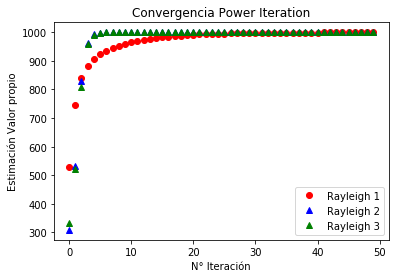

In [10]:
plt.plot(R1, 'ro', label='Rayleigh 1')
plt.plot(R2, 'b^', label = 'Rayleigh 2')
plt.plot(R3, 'g^', label= 'Rayleigh 3')
plt.legend(loc='best', numpoints=1)
plt.title("Convergencia Power Iteration")
plt.xlabel("N° Iteración")
plt.ylabel("Estimación Valor propio")
plt.show()

### e) Concluya respecto a los resultados anteriores
* ¿A qué se deben los resultados obtenidos?.
* ¿Cómo influyen los valores propios en la aplicación de *Power Iteration*?. Explique.

Para esta pregunta analizaremos las convergencias para los distintos arreglos de valores propios: <br>
Por el enunciado, sabemos que:
$$
S = \frac{|\lambda_2|}{|\lambda_1|}
$$
determina la tasa de convergencia. Como sabemos, este algoritmo corresponde a un FPI, por lo tanto su convergencia es lineal con tasa $S$. 

In [11]:
def convergence(n): # input: set of eigenvalues
    return abs(n[-2])/abs(n[-1])

In [12]:
s1 = convergence(n1) #Convergencia para n1
s2 = convergence(n2) #convergencia para n2
s3 = convergence(n3) #convergencia para n3

In [13]:
print('Convergencia para arreglo n1:', s1)
print('Convergencia para arreglo n2:', s2)
print('Convergencia para arreglo n3:', s3)

Convergencia para arreglo n1: 0.990909090909091
Convergencia para arreglo n2: 0.5
Convergencia para arreglo n3: 0.42768082682566333


Como podemos ver en el gráfico de la pregunta (d), <i>power iteration</i> aplicado a las matrices 2 y 3 converge en pocas iteraciones al valor propio dominante, y esto se debe a la tasa de convergencia. 

Como se comprueba anteriormente, las tasas de convergencia $S$ son $S1>S2>S3$ lo que significa que el error va disminuyendo linealmente por el factor $S < 1$. Es decir, mientras menor sea el factor $S$ ($0<S<1$) más rápido se logra la convergencia, lo cual se comprueba con nuestros resultados.

### f) Componentes del *initial guess*
Construya una matriz simétrica con valores propios equiespaciados. Dado que usted tiene los vectores propios, construya un *initial guess* cuyo coeficiente asociado al vector propio dominante sea cero, es decir, es una combinación lineal de los otros vectores propios. Lo anterior se expresa como:
$$
    \mathbf{x}_0 = \sum_{i = 2}^n c_i\mathbf{v}_i.
$$

* Aplique *Power Iteration* sobre la matriz construída con el *initial guess* indicado anteriormente. Realice unas 50 iteraciones.
* ¿Converge?, ¿a qué valor propio converge?.
* Explique lo ocurrido anteriormente.
* Ahora realice el mismo experimento, pero con un número considerablemente mayor de iteraciones (unas $10^5$ iteraciones). ¿Qué ocurre?, ¿sucedió lo mismo que en el experimento anterior?. Entrege alguna razón de lo ocurrido.

In [14]:
A4, Q4 = get_matrix(n1) #Q4 contain eigenvectors
L4, V4 = LA.eigh(A4) # V4 = eigenvectors
np.dot(Q4[-1].T,np.dot(L4[-1], Q4[-1]))

999.9999999999999

In [15]:
np.random.seed(0)
x_g = np.random.rand((100)) #array with 100 random numbers
x_g[-1,] = 0 #set the component of dominant eigenvector 0
i_g = np.dot(Q4, x_g) # set initial guess as linear combination of V and x_g 

Los valores propios están ordenados de menor a mayor en el arreglo por lo que bastaría con hacer 0 la última columna de la matriz de vectores propios, es decir, el último vector propio, ya que es el que está asociado al valor propio dominante. Luego tenemos el <i>initial_guess</i> como combinación lineal de los restantes vectores propios como se solicita.

In [16]:
#another way
#init_guess = np.dot(Q4[:,:-1], np.random.rand(99)) # initial guess as a linear combination of eigenvectors except v1

In [17]:
lamb4, U4, R4 = power_iteration(A4, i_g, 70, True)

Power Iteration Method
k=70, lambda=+990.122, u=[-0.07788385 -0.20218659 -0.00448005 -0.13271531  0.01740063 -0.06536317
  0.13922835 -0.09904436  0.10347535 -0.03777679 -0.04883504  0.05022531
  0.10467246 -0.07724679 -0.19559393  0.06939658 -0.04514585 -0.11040913
  0.25120418 -0.04802599 -0.03299286 -0.0634537  -0.05570222 -0.08283808
  0.14469655  0.01019673  0.11984472 -0.11488619 -0.12617257  0.10978741
 -0.02705594  0.10384543  0.12325434 -0.0595478  -0.0326705   0.14444772
 -0.03751892  0.04088702 -0.0601594  -0.0697914  -0.17852019  0.06621384
  0.04562534  0.07882676  0.20078814  0.12936814 -0.01856863  0.08046944
 -0.05617817  0.14254815  0.07309562 -0.07146367  0.00407033  0.17579146
 -0.13462919 -0.09808457  0.00438771  0.00319516  0.08048898  0.02479235
  0.09281481 -0.10493915  0.05981108  0.00863032  0.07364571 -0.01531085
 -0.10631565  0.0973986  -0.15905506 -0.09359366  0.0626172  -0.04221509
 -0.20477278 -0.07597454  0.12989585  0.02705826 -0.09526157 -0.02637669
  0

Nos percatamos que luego de 70 iteraciones (luego de 50 aún no "convergía"), el algoritmo "converge" al valor propio $\lambda_2$, osea, el segundo valor propio mayor en magnitud. Esto ocurre ya que al quitar la componente asociada al valor propio dominante (i.e el vector propio dominante de nuestra matriz de vectores propios), se tiende a perder esa dirección provocando que el algoritmo converga en la dirección de la segunda componente mayor, es decir: 

Podemos escribir nuestro vector <i>initial guess</i> de la siguiente forma: 
$$ \vec{x_0} = c_1 \vec{v_1} + c_2 \vec{v_2} + \cdots + c_n \vec{v_n} $$

Por lo que, removemos la parte asociada al valor propio dominante, según lo requerido en este ejercicio: 
$$ \vec{x_0} = c_2 \vec{v_2} + c_3 \vec{v_3} + \cdots + c_n \vec{v_n} $$

Lo anterior, teóricamente nos daría como resultado al iterar <i>k - veces</i>:
$$A^k \vec{x_0} = c_2 \lambda_2^{k} \vec{v_2} + \cdots c_n \lambda_n^k \vec{v_n} $$ 

Y por lo tanto, nuestro algoritmo teóricamente debiera converger al valor propio $\lambda_2$ al normalizar todo por $\lambda_2^k$.

Para comprobar lo propuesto, haremos iterar 10000 veces y observaremos:

In [18]:
lamb4, U4, R4 = power_iteration(A4, i_g, 10000, False)

In [19]:
lamb4

999.9999999999995

¡Convergemos al valor propio dominante! ¿Por qué? <br>
Resulta que hemos removido $\vec{v_1}$ del <i>initial guess</i>, pero no lo hemos hecho durante las siguientes iteraciones, por lo que **inicialmente** se converge al **segundo** valor propio dominante, pero luego, a medida que $k$ tiende a infinito, **emerge** una pequeña parte de $\vec{v_1}$ **producto de errores de redondeo de la máquina**. Por lo cual, si no volvemos a eliminar ese pequeño componente iteración tras iteración, tal componente irá creciendo y la computación converge a $\lambda_1, \vec{v_1}$ nuevamente. 

### g) Caso $|\lambda_1| = |\lambda_2|$, con $\lambda_1 = \lambda_2$
Genere una matriz simétrica con el algoritmo construído en la primera pregunta que posea dos valores propios dominantes, de igual magnitud e igual valor. Aplique *Power Iteration* y grafique el cuociente de Rayleigh obtenido en cada iteración.
* ¿Converge al valor propio dominante?
* ¿Qué ocurre con el vector obtenido en *Power Iteration*?, ¿converge a alguno de los vectores propios dominantes?, ¿cómo está definido el vector propio obtenido?.

In [20]:
n4 = np.linspace(100, 1000, 100) #set eigenvalues
n4[-2]=1000

In [21]:
A5, V5 = get_matrix(n4)
L5, V5 = LA.eigh(A5)

In [22]:
init_guess_g = np.random.rand((100)) #set initial guess
init_guess_g = np.dot(init_guess_g, V5)
lamb5, U5, R5 = power_iteration(A5, init_guess_g, 500, False)
print('valor propio dominante', lamb5)
#print('vector propio dominante', U5)

valor propio dominante 999.9999999563298


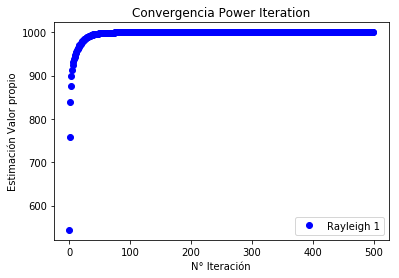

In [23]:
plt.plot(R5, 'bo', label='Rayleigh 1')
plt.legend(loc='best', numpoints=1)
plt.title("Convergencia Power Iteration")
plt.xlabel("N° Iteración")
plt.ylabel("Estimación Valor propio")
plt.show()

El problema sí converge al valor propio dominante, y esto es porque ocurre lo siguiente:
$$x_0 = \sum_{i=1}^{n} c_i \vec{v_i}$$ 
\begin{equation}
|\lambda_1| = |\lambda_2| \\
\end{equation}

Por lo que aplicando el método de power iteration: 
\begin{align}
A x_0 &= A \sum_{i=1}^{n} c_i A \vec{v_i} = \sum_{i=1}^{n} c_i \lambda_i \vec{v_i} \\
 A^2 x_0 &= \sum_{i=1}^{n} c_i \lambda_i^2 \vec{v_i} \\
 \vdots &= \vdots \\
 A^k x_0 &= \sum_{i=1}^n c_i \lambda_i^k \vec{v_i} \\ 
 &= \lambda_1^k c_1 \vec{v_i} + \lambda_1^k c_2 \vec{v_i}+ \cdots + \lambda_n^k c_n \vec{v_i}\\
 &= \lambda_1^k (c_1 + c_2)\vec{v_i} + \cdots + \lambda_n^k c_n \vec{v_i} \\
 \vdots &= \vdots \\
 \text{           dividiendo por $\lambda_1^k$ }\\
 \frac{A^k x_0}{\lambda_1^k} &= c_1 \vec{v_1} + c_2 \vec{v_2}
\end{align}

Lo cual tiene componentes asociados al vector propio dominante y al segundo vector dominante que es igual al primero, por lo tanto el algoritmo converge con tasa 1.

El vector propio resultante está definido como la **combinación lineal** de los primeros dos vectores propios dominantes, el cual es un vector propio dominante también. 

Resulta que la tasa de convergencia para este experimento es $S = \frac{|\lambda_2|}{|{\lambda_1}|} = 1$, y en base a las condiciones de nuestra matriz, power iteration no garantiza convergencia ya que no cumple con los requisitos. 

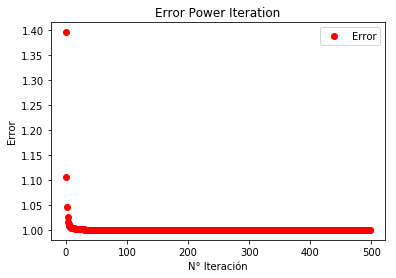

In [24]:
p_c = np.dot(init_guess_g[-1], U5) + np.dot(init_guess_g[-2], U5)
error = []
for i in range(len(R5)-1):
    error.append(R5[i+1]/R5[i]) #Acá se comprueba la tasa de error s = 1
plt.plot(error, 'ro', label='Error')
plt.legend(loc='best', numpoints=1)
plt.title("Error Power Iteration")
plt.xlabel("N° Iteración")
plt.ylabel("Error")
plt.show()

* Si se define la matriz $B$ como:
$$
    B = A - \lambda_1\mathbf{v}_1\mathbf{v}_1^T,
$$
donde $\lambda_1$ y $\mathbf{v}_1$ son los valores y vectores propios encontrados con P.I anteriormente. ¿Cuales son los valores y vectores propios de la matriz $B$?.
* ¿Cómo puede utilizar lo anterior para encontrar el vector propio asociado al otro valor propio dominante de $A$?. Explíquelo y muéstrelo numéricamente.

In [25]:
np.dot(U5, U5.T)

1.0

In [26]:
B = A5 - np.dot(lamb5, np.dot(U5,U5.T))
LB, VB = LA.eigh(B) #eigenvals of B

np.random.seed(1234)
x_5 = np.random.rand((100))
x_5 = x_5 / norm(x_5)

LambB, UB, RB  = power_iteration(B, x_5, 50, False)
LambB

-99464.41865018221

El valor propio dominante encontrado corresponde a un valor que no es y que fue generado producto del error. Para hallar el valor propio dominante real entonces deberíamos usar deflation sobre este valor encontrado, y luego encontrar el siguiente 

In [27]:
def deflation(B, lamb, U, x):
    B1 = B-lamb*np.dot(U, x.T)
    return B1

In [28]:
LB = np.sort(abs(LB))
#LB

In [30]:
C, V_c = get_matrix(LB)

eigval_c, eigvec_c = LA.eigh(C)
np.random.seed(1234)
x_6 = np.random.rand((100))
x_6[-1,] = 0
x_6 = x_6/norm(x_6)
x_6 = np.dot(x_6, V_c) 
lambda_c, U_c, R_c = power_iteration(C, x_6, 10)

Un camino sencillo es que como sabemos a priori que el valor propio dominante está en cierto rango (o bien el valor exacto), un algoritmo sería usar inverse_power_iteration aplicando un shift acorde al valor propio que se quiere encontrar. 

In [31]:
def inverse_power_iteration(A, x, s, k, verbose=False):
    """
    Program 12.2 Inverse Power iteration
    Computes eigenvector of square matrix nearest to input s
    Input: matrix A, initial (nonzero) vector x, shift s, number of steps k
    Output: dominant eigenvalue lam, eigenvector of inv(A-sI)
    """
    if verbose: print("Inverse Power Iteration Method\n%s"%('='*80))
    As = A - s*np.eye(*A.shape)
    for j in range(k):
        u = x/norm(x)
        x = solve(As, u)
        lam = np.dot(u.T, x)
        if verbose: print("k=%d, lambda=%+.3f, u=%s"%(j,1./lam+s,str(u.T)))
    u = x/norm(x)
    if verbose: print("k=%d, lambda=%+.3f, u=%s\n"%(j+1,1./lam+s,str(u.T)))
    return (1./lam+s, u)

In [32]:
lambda_c_inv, U_c_inv = inverse_power_iteration(C, x_6, 1000, 10)
lambda_c_inv

999.9999999999989

El método formal que se debiese usar para hallar el segundo valor propio 1000, será implementar deflation.

Elegiremos un vector tal que $\vec{u_1}^T \vec{x_1} = \lambda_1 $

Los valores propios de $C - \vec{x_1}\vec{u_1}^T$ serán $0, \lambda_2, \cdots, \lambda_n$

Escogemos $\vec{u_1} = \lambda_1 \vec{x_1} $ ya que C es simétrica y normalizada tal que $||{x_1}||_2=1$

Luego se realiza power iteration sobre esa matriz y se converge a $\lambda_2$.

La implementación de deflation en la teoría sirve para encontrar todos los valores propios de una matriz, "quitándole" las componentes asociadas al valor propio dominante a medida que se van encontrando dichos valores, para luego encontrar los siguientes mayores y así sucesivamente, en la práctica esto va arrastrando un round-off error que trae consecuencias muy negativas en algunos casos, por lo que hay que buscar formas de disminuir dicho error como escoger el initial guess a conveniencia, entre otras cosas que se comprueban en esta tarea.